<a href="https://www.kaggle.com/code/gullarfarzali/house-price-prediction?scriptVersionId=254022167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
import os

# Data exploration and pre-processing

In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# check for nulls
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.describe(include='number')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# percentage of houses with no bedroom info
df['total_bedrooms'].isnull().mean()*100

1.002906976744186

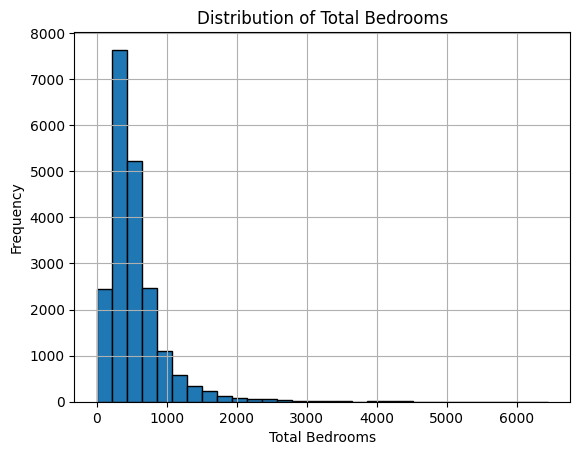

In [10]:
# distribution of 'total_bedrooms' column
df['total_bedrooms'].hist(bins=30, edgecolor='black')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bedrooms')
plt.show()

In [11]:
# fill nulls with the median value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Train-test split

In [12]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [14]:
X_train['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6430
INLAND        4576
NEAR OCEAN    1851
NEAR BAY      1587
ISLAND           3
Name: count, dtype: int64

In [15]:
df.shape

(20640, 10)

# Data standardization

In [16]:
numerical_columns = X_train.select_dtypes('number').columns

In [17]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[numerical_columns])

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)

In [19]:
X_test_scaled = sc.transform(X_test[numerical_columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# Feature encoding

In [20]:
ohe = OneHotEncoder(sparse_output=False)
ocean_proximity_encoded = ohe.fit_transform(X_train[['ocean_proximity']])
ocean_df = pd.DataFrame(ocean_proximity_encoded, columns=ohe.get_feature_names_out(['ocean_proximity']), index=X_train.index)

In [21]:
X_train_scaled = pd.concat([X_train_scaled, ocean_df], axis=1)

In [22]:
ocean_proximity_encoded_test = ohe.transform(X_test[['ocean_proximity']])

encoded_cols = ohe.get_feature_names_out(['ocean_proximity'])
ocean_test_df = pd.DataFrame(ocean_proximity_encoded_test, columns=encoded_cols, index=X_test.index)

In [23]:
X_test_scaled = pd.concat([X_test_scaled, ocean_test_df], axis=1)

# Model training and predicting

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred_test = lr.predict(X_test_scaled)
y_pred_train = lr.predict(X_train_scaled)

# Model evaluation

In [26]:
print("MAE of y_pred_test: ", mae(y_pred_test, y_test))
print("MSE of y_pred_test: ", mse(y_pred_test, y_test))
print("MAPE of y_pred_test: ", mape(y_pred_test, y_test))

MAE of y_pred_test:  50054.50193361729
MSE of y_pred_test:  4777021863.086242
MAPE of y_pred_test:  1.2917452387184603


In [27]:
print("MAE of y_pred_train: ", mae(y_pred_train, y_train))
print("MSE of y_pred_train: ", mse(y_pred_train, y_train))
print("MAPE of y_pred_train: ", mape(y_pred_train, y_train))

MAE of y_pred_train:  49868.12495052452
MSE of y_pred_train:  4703620873.472097
MAPE of y_pred_train:  0.33045607919874015
